<a href="https://colab.research.google.com/github/NehilDanis/GANsAndVAEs/blob/master/NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classifier

* sampling from a class
* Bayes classifier is a generative model
* In the Bayes classifier the aim is to model P(X, y ) rather than modelling P(y | X).
* In discriminative models, the model is trained by looking at all the data and labels, and when unknown labelled data given to the model, it can calculate the predicted label.
* Though in generative models, rather than looking at all classes together, every single class is observed separately. Once each class is modelled, given the class label, new data can be generated. 
* It is called **naive** because of the assumption that all data samples are independent and identically distibuted. For example if you are trying to estimate the likelihood of a mail to be spam, then the word order does not matter for naive bayes classifier. It will simply consider that each word in the mail are independent from one another.

## Sampling from P(X | y = k)

* Given the class information, data in the class k can be modelled.
* Data ca be modelled using many different distributions.
* In case of discrete data it is best to calculate the frequency of each attribute value for a given class value divided by the frequency of instances with that class value.

For example if we are to model the weather being rainy given the state is California:

*p(X = rainy | y = California) = **count**(instances with weather rainy and state is California) / **count**(all weather instances in california)*

* In case we work with continous data, Gaussian distribution can be used to model data, given the class label. 
* It is easy to model the Gaussian distribution, since only mean and the standard deviation needs to be estimated from the training data.

Given the class label the mean and the variance/covariance of the data need to be calculated. 

If data will be modelled as a gaussian, make sure that its univariate distribution is close to Gaussian.


## Sampling from P(X, y = k)

* Even though P(X | y = k) helps us to calculate the likelihood of a sample given that it belongs to a certain class, it is also consider the propabilty of that class.
* P(X | y = k) p(y = k) 
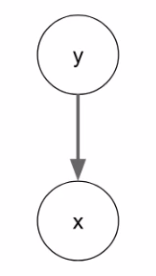

* As it is seen in the above diagram, it is clear there is a dependence between x and y.
* Each node of the diagram represents a distribution.
* Hence y should also have its own distribution.
* Class distirbution can be represented using categorical/discrete distribution.
* P(y = k) can be calculated by dividing the number of samples belongs to class k with the number of all the samples in data X.

*p(y = k) = **count**(instances of class k) / **count**(all instances)*

In [46]:
#do imports
import numpy as np
from scipy.stats import multivariate_normal as mvn
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

### Get Data

In [34]:
df = pd.read_csv("/content/sample_data/mnist_train_small.csv")
data = df.values # transform data from data frame to numpy array
X = data[:, 1:] / 255.0 # normalize the data
y = data[:, 0]
X.shape
shuffled_idx = np.random.shuffle(np.arange(len(y)))
X, y = np.squeeze(X[shuffled_idx]), np.squeeze(y[shuffled_idx])

### Visualize Some Samples from Data

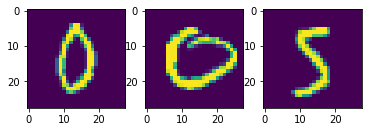

In [45]:
# visalize few image
r = 1
c = 3

fig = plt.figure()

# obtain an image and show it
indices = np.random.choice(len(y), 3, replace=False)
fig.add_subplot(r, c, 1) # first position
plt.imshow(X[indices[0]].reshape(28, 28))
fig.add_subplot(r, c, 2) # second position
plt.imshow(X[indices[1]].reshape(28, 28))
fig.add_subplot(r, c, 3) # third position
plt.imshow(X[indices[2]].reshape(28, 28));

### The Classifier

In [47]:
class BayesClassifier:
  def fit(self, X, y):
    # here we will assume that the classes are numbered from 0...K-1
    self.K = len(set(y)) 

    self.gaussians = []
    # loop through all possible classes and model their gaussian distribution
    for k in range(self.K):
      Xk = X[y == k] # all the samples which belongs to class k
      mean = Xk.mean(axis = 0) # mean of each column
      cov = np.cov(Xk.T) # we need to take the transpose to make a (N, 1) shaped
      # vector instead of (1, N)
      g = {'m': mean, 'c': cov}
      self.gaussians.append(g)
  
  def sample_given_y(self, y):
    class_dist = self.gaussians[y]
    return mvn.rvs(mean=class_dist['m'], cov=class_dist['c'])

  def sample(self):
    k = np.random.randint(self.K)
    return self.sample_given_y(k)

### Visualized the Generated Samples

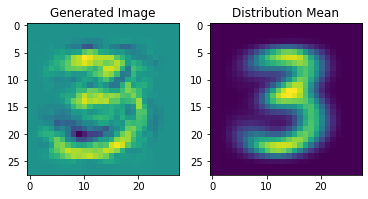

In [50]:
clf = BayesClassifier()
clf.fit(X, y)
sampled_data = clf.sample_given_y(3).reshape(28, 28)
sampled_dist_mean = clf.gaussians[3]['m'].reshape(28, 28)

r = 1
c = 2

fig = plt.figure()

# add the sampled image
fig.add_subplot(r, c, 1)
plt.imshow(sampled_data)
plt.title("Generated Image")

# add the mean image of the distribution
fig.add_subplot(r, c, 2)
plt.imshow(sampled_dist_mean)
plt.title("Distribution Mean");



## References
* [Naive Bayes for Machine Learning](https://machinelearningmastery.com/naive-bayes-for-machine-learning/)
* [Deep Learning: GANs and Variational Autoencoders
](https://www.udemy.com/share/101Xwm3@ZkNqeQp4EN5lX7Y4mHSeIS2-ptrJ15UqoGLF5Q2fJ8xNr5mlBv3vnfnB8oXSR6r8VA==/)